# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [69]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        data = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data["coord"]["lat"]
        city_lng = data["coord"]["lon"]
        city_max_temp = data["main"]["temp_max"]
        city_humidity = data["main"]["humidity"]
        city_clouds = data["clouds"]["all"]
        city_wind = data["wind"]["speed"]
        city_country = data["sys"]["country"]
        city_date = data["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | inirida
Processing Record 5 of Set 1 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 6 of Set 1 | north side
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | saipan
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | minas de marcona
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | blagoveshchenka
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | mejit
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | edinburgh of the seven sea

Processing Record 36 of Set 4 | haiku-pauwela
Processing Record 37 of Set 4 | zaozersk
Processing Record 38 of Set 4 | tofol
Processing Record 39 of Set 4 | east ballina
Processing Record 40 of Set 4 | williamston
Processing Record 41 of Set 4 | zhaotong
Processing Record 42 of Set 4 | santa terezinha
Processing Record 43 of Set 4 | island harbour
Processing Record 44 of Set 4 | angra do heroismo
Processing Record 45 of Set 4 | keflavik
Processing Record 46 of Set 4 | moyynkum
Processing Record 47 of Set 4 | dwarka
Processing Record 48 of Set 4 | yangor
City not found. Skipping...
Processing Record 49 of Set 4 | kattivakkam
Processing Record 0 of Set 5 | happy valley-goose bay
Processing Record 1 of Set 5 | taiohae
City not found. Skipping...
Processing Record 2 of Set 5 | majene
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | rudnya
Processing Record 5 of Set 5 | fale old settlement
Processing Record 6 of Set 5 | saudarkrokur
Processing Record 7 of Set 5 | shinkafi

Processing Record 25 of Set 8 | watsa
Processing Record 26 of Set 8 | beykonak
Processing Record 27 of Set 8 | dalnerechensk
Processing Record 28 of Set 8 | phan thiet
Processing Record 29 of Set 8 | bovalino
Processing Record 30 of Set 8 | puerto asis
Processing Record 31 of Set 8 | talcahuano
Processing Record 32 of Set 8 | saint-pierre
Processing Record 33 of Set 8 | taksimo
Processing Record 34 of Set 8 | cannonvale
Processing Record 35 of Set 8 | balkashino
Processing Record 36 of Set 8 | mirny
Processing Record 37 of Set 8 | cerro largo
Processing Record 38 of Set 8 | tolanaro
Processing Record 39 of Set 8 | novoishimskiy
Processing Record 40 of Set 8 | weno
Processing Record 41 of Set 8 | taungdwingyi
Processing Record 42 of Set 8 | alice springs
Processing Record 43 of Set 8 | namibe
Processing Record 44 of Set 8 | marion
Processing Record 45 of Set 8 | st. john's
Processing Record 46 of Set 8 | tevragh zeina
City not found. Skipping...
Processing Record 47 of Set 8 | antonio e

Processing Record 17 of Set 12 | severo-yeniseyskiy
Processing Record 18 of Set 12 | chibougamau
Processing Record 19 of Set 12 | nadym
Processing Record 20 of Set 12 | papao
Processing Record 21 of Set 12 | andergrove
Processing Record 22 of Set 12 | bengkulu
Processing Record 23 of Set 12 | ezhva
Processing Record 24 of Set 12 | yonggang-up
Processing Record 25 of Set 12 | bikenibeu village
Processing Record 26 of Set 12 | amahai
-----------------------------
Data Retrieval Complete      
-----------------------------


In [70]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Show record count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [71]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,17.35,82,78,0.86,US,1687228909
1,port-aux-francais,-49.3500,70.2167,3.16,67,59,12.92,TF,1687228909
2,ribeira grande,38.5167,-28.7000,18.76,91,91,1.79,PT,1687228909
3,inirida,3.8653,-67.9239,22.40,96,64,0.53,CO,1687228910
4,north side,19.3500,-81.2000,29.04,84,20,3.60,KY,1687228910


In [72]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [73]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,17.35,82,78,0.86,US,1687228909
1,port-aux-francais,-49.3500,70.2167,3.16,67,59,12.92,TF,1687228909
2,ribeira grande,38.5167,-28.7000,18.76,91,91,1.79,PT,1687228909
3,inirida,3.8653,-67.9239,22.40,96,64,0.53,CO,1687228910
4,north side,19.3500,-81.2000,29.04,84,20,3.60,KY,1687228910


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

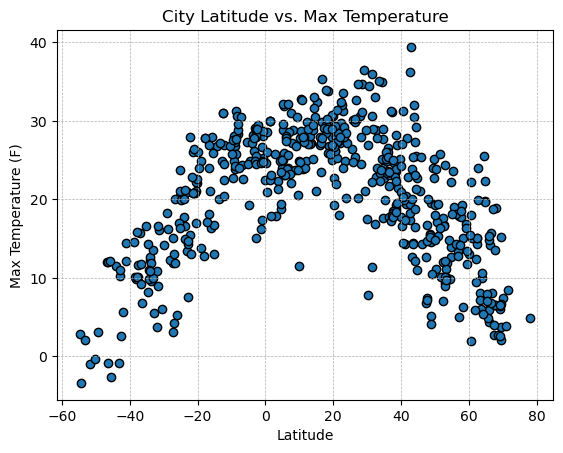

In [74]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")
plt.grid(linestyle='--', linewidth=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

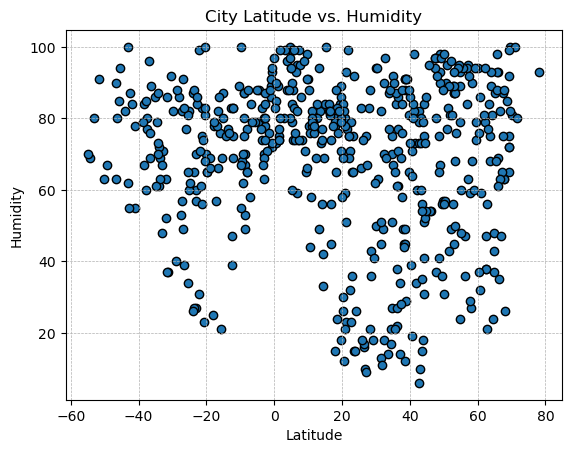

In [75]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")
plt.grid(linestyle='--', linewidth=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

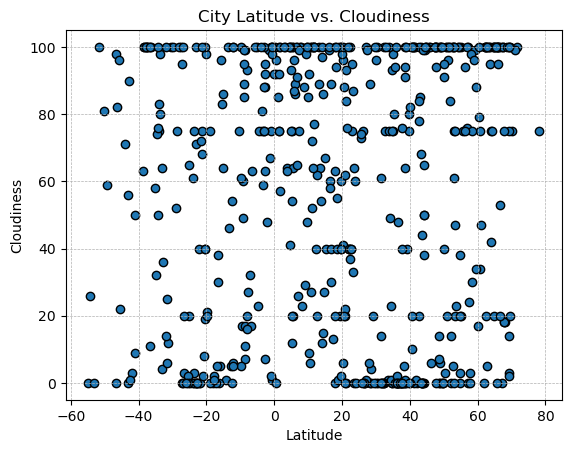

In [76]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")
plt.grid(linestyle='--', linewidth=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

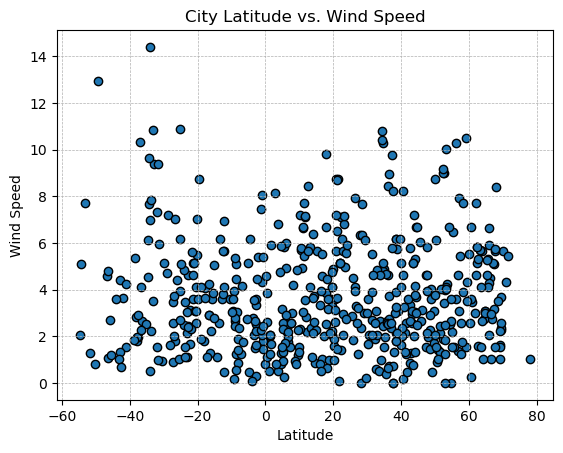

In [77]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")
plt.grid(linestyle='--', linewidth=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [147]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,17.35,82,78,0.86,US,1687228909
2,ribeira grande,38.5167,-28.7000,18.76,91,91,1.79,PT,1687228909
3,inirida,3.8653,-67.9239,22.40,96,64,0.53,CO,1687228910
4,north side,19.3500,-81.2000,29.04,84,20,3.60,KY,1687228910
6,yellowknife,62.4560,-114.3525,14.29,47,20,5.14,CA,1687228910


In [148]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,3.16,67,59,12.92,TF,1687228909
5,port alfred,-33.5906,26.8910,9.54,69,80,2.24,ZA,1687228910
9,puerto natales,-51.7236,-72.4875,-1.00,91,100,1.30,CL,1687228911
10,puerto ayora,-0.7393,-90.3518,25.31,93,1,1.79,EC,1687228911
12,minas de marcona,-15.2119,-75.1103,13.01,87,64,5.04,PE,1687228911


In [149]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line y-values
    regress_values = x_values * slope + intercept
    
    # Create the line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create the scatter plot with regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    # Add the line equation to the plot
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # Add title, x and y labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Print r-value
    print(f"The r-value is: {rvalue}")
    
plt.show()    

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7072976521486466


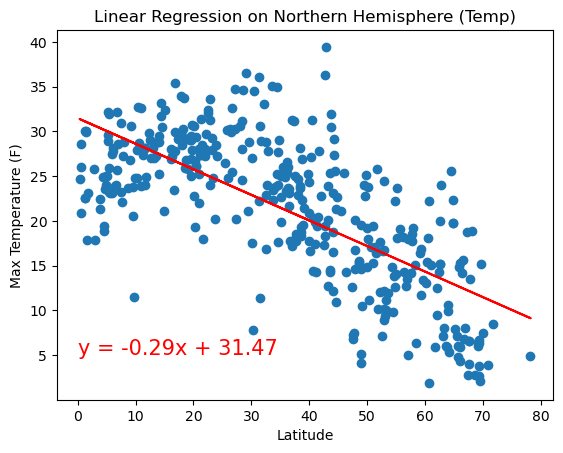

In [150]:
# Linear regression on Northern Hemisphere
from scipy import stats
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemisphere (Temp)', 'Latitude', 
                       'Max Temperature (F)', (0, 5))


The r-value is: 0.8333954135275168


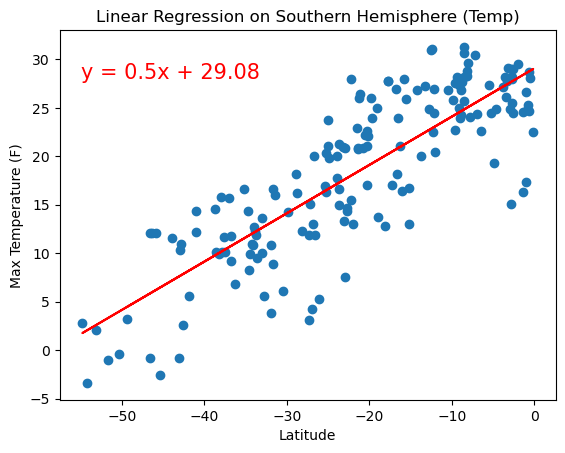

In [151]:
# Linear regression on Southern Hemisphere
from scipy import stats
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Southern Hemisphere (Temp)', 'Latitude', 
                       'Max Temperature (F)', (-55,28))

**Discussion about the linear relationship:** The linear relationship in the Northern Hemisphere is much greater than the linear relationship in the Southern Hemisphere when comparing Latitude coordinates to Max Temperatures. In the Northern hemisphere, there is a strong negative correlation as The latitude vs. temperature plot for different cities also showed the strong coorelation between the temperature and thier distance from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.06973912389776549


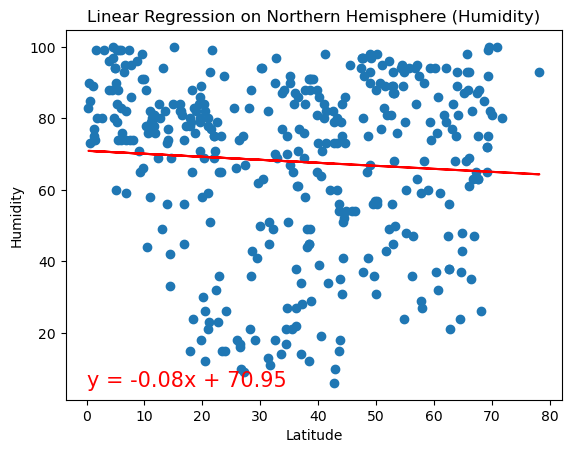

In [152]:
# Northern Hemisphere
from scipy import stats

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemisphere (Humidity)', 
                       'Latitude', 'Humidity', (0,5))

The r-value is: 0.06885705454665432


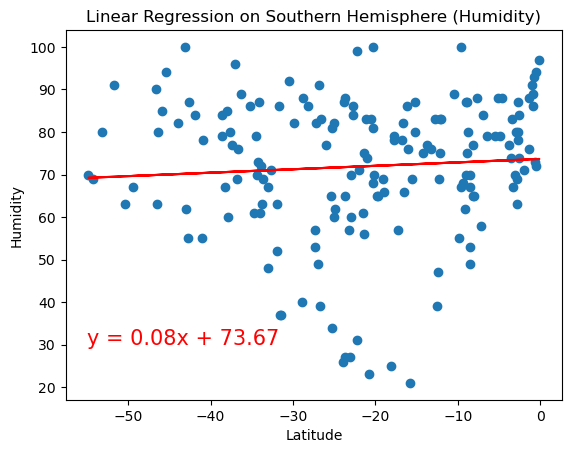

In [154]:
# Southern Hemisphere
from scipy import stats

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Southern Hemisphere (Humidity)', 
                       'Latitude', 'Humidity', (-55,30))

**Discussion about the linear relationship:** Higher levels of humidity are observed close to the equator but the r-value is less than .50 and there is a mild correlation between Latitude & Humidity in both hemispheres. It is apparent in the data that there is almost no correlation between humidity levels and a city position on the Northern and Southern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.029532489633548844


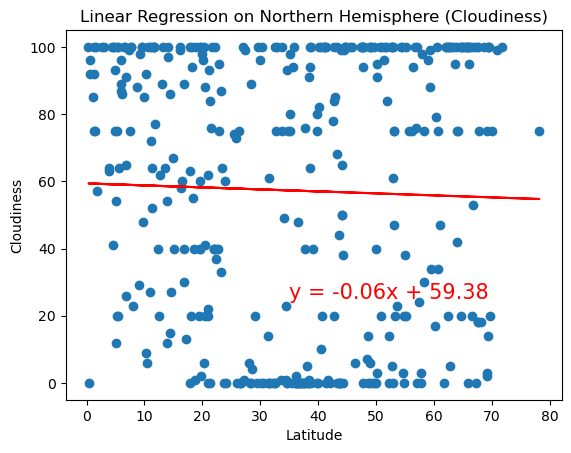

In [155]:
# Northern Hemisphere
from scipy import stats

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemisphere (Cloudiness)', 
                       'Latitude', 'Cloudiness', (35,25))

The r-value is: 0.06488830504122588


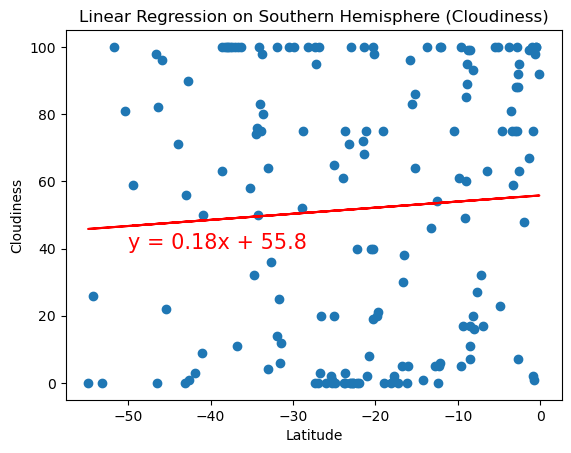

In [156]:
# Southern Hemisphere
from scipy import stats

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Southern Hemisphere (Cloudiness)', 
                       'Latitude', 'Cloudiness', (-50,40))

**Discussion about the linear relationship:** Both plots show that there isn't correlation between cloudiness and latitude on the Northern and Southern Hemisphere. Cloudiness levels are scatttered across all latitudes, with levels ranging from 0% to 100%

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05761800019371412


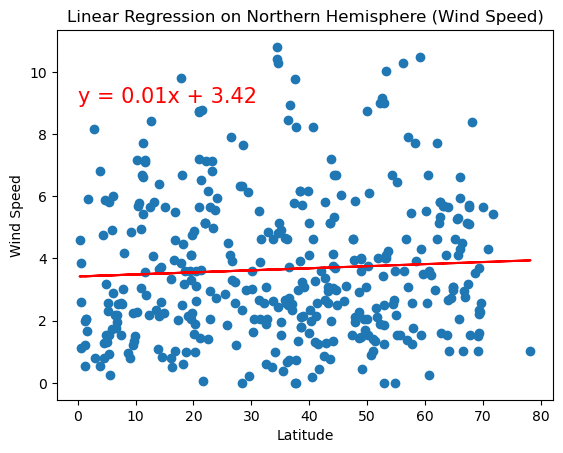

In [158]:
# Northern Hemisphere
from scipy import stats

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemisphere (Wind Speed)', 
                       'Latitude', 'Wind Speed', (0,9))

The r-value is: -0.1700977884546727


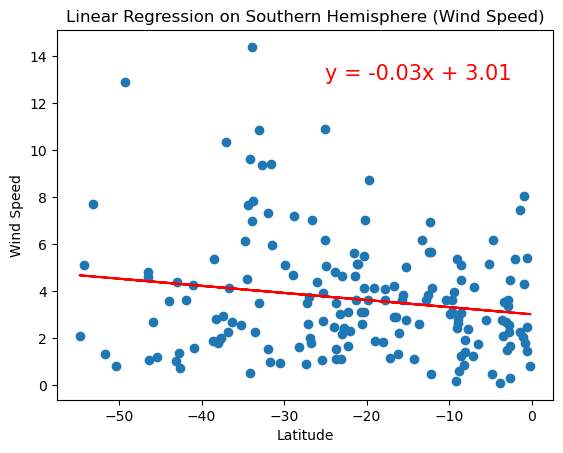

In [160]:
# Southern Hemisphere
from scipy import stats

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Southern Hemisphere (Wind Speed)', 
                       'Latitude', 'Wind Speed', (-25,13))

**Discussion about the linear relationship:** The Southern Hemisphere is showing a mild correlation between Latitude & Wind Speed; however, Northern Hemisphere is showing no correlation. It is clear that the data shows the wind speeds become more scattered with decreasing latitudes. 